# Machine Learning Optimization for Business Implementation 🏨

# 1. Business Overview n Data Understanding
---

## 📊 Business Understanding

### 🏷️ Project Title:
**Improving Hotel Revenue by Predicting Booking Cancellations**

### 🧠 Background:
In the hospitality industry, managing bookings efficiently is crucial to maintaining revenue and operational stability. One of the most pressing challenges faced by hotels is **booking cancellations**. These cancellations can lead to:

- Revenue loss from empty rooms,
- Operational inefficiencies,
- Poor forecasting and inventory management.

By leveraging historical booking data and applying predictive modeling, hotels can forecast the **likelihood of a booking being canceled**. This allows for proactive strategies such as **overbooking policies**, **dynamic pricing**, or **targeted re-engagement campaigns** for at-risk reservations.

### 🎯 Objective:
To predict whether a hotel booking will be **canceled** (`is_canceled = 1`) using features such as customer demographics, booking behavior, and reservation details. The predictions will support **revenue optimization strategies** and **resource planning** for hotel operations.

---

## ❗ Problem Identification

The key challenges to be addressed:

1. 📉 **High Cancellation Rates:** Sudden cancellations reduce room occupancy and revenue potential.
2. 🕰️ **Operational Inefficiency:** Last-minute changes lead to underutilized staff and inventory.
3. 📊 **Poor Forecasting Accuracy:** Unpredictable cancellations distort demand forecasting and revenue planning.
4. 🎯 **Lack of Targeted Strategy:** Without prediction, the hotel cannot apply differentiated treatment for high-risk bookings.

---

## 🧮 Definition of False Positive (FP) and False Negative (FN)

**Target variable:** `is_canceled`

- ✅ **Positive Class (1):** The booking **was canceled**
- ❌ **Negative Class (0):** The booking **was not canceled**

| 🧾 **Actual vs Predicted Outcome** | 🔮 Predicted: Canceled | 🔮 Predicted: Not Canceled |
|-----------------------------------|------------------------|----------------------------|
| ✅ **Actual: Canceled**            | 🎯 True Positive (TP)  | ❌ False Negative (FN)     |
| ❌ **Actual: Not Canceled**        | ⚠️ False Positive (FP) | ✔️ True Negative (TN)      |

### ⚠️ False Positive (FP):
- **Prediction:** Booking will be canceled  
- **Actual:** Booking was honored  
- **Impact:** Hotel may unnecessarily overbook or adjust operations, potentially degrading guest experience  
- 💸 Estimated cost: ± **$100 per booking** (guest dissatisfaction, overbooking management, or refund handling, wasted advertising fee)

### ❌ False Negative (FN):
- **Prediction:** Booking will not be canceled  
- **Actual:** Booking was canceled  
- **Impact:** Room remains unoccupied, leading to direct revenue loss  
- 💸 Estimated cost: ± **$500 per booking** (low occupancy rate)

---

## 🎯 Optimization Goals

- 🔻 **Minimize False Negatives:** Avoid unanticipated cancellations and revenue loss.
- ⚖️ **Control False Positives:** Prevent unnecessary operational adjustments or poor guest experience.
- 📈 **Revenue Protection:** Improve planning around staffing, pricing, and inventory management.
- 🧠 **Decision Support:** Enable smarter strategies for overbooking or incentives for high-risk reservations.

> 💡 **Conclusion:** In this business case, the model should emphasize **recall** (minimizing FN) to reduce financial loss from unexpected cancellations. We will use **F2-score** to evaluate the model, giving higher weight to recall than precision.

## Dataset Column Descriptions: Hotel Booking Demand

Below is a detailed explanation of each column in the `data_hotel_booking_demand.csv` dataset:

| **Column Name**                  | **Description** |
|----------------------------------|-----------------|
| **country**                      | ISO 3166-1 alpha-3 country code representing the guest's country of origin (e.g., PRT for Portugal, FRA for France). |
| **market_segment**               | Booking distribution channel, such as 'Online TA' (Online Travel Agent), 'Offline TA/TO' (Offline Travel Agent/Tour Operator), 'Direct', etc. |
| **previous_cancellations**       | Number of previous bookings by the customer that were canceled before the current booking. |
| **booking_changes**              | Number of modifications made to the booking (e.g., date changes, number of guests) from the time of reservation until check-in or cancellation. |
| **deposit_type**                 | Type of deposit made by the customer to guarantee the booking: 'No Deposit', 'Non Refund', or 'Refundable'. |
| **days_in_waiting_list**         | Number of days the booking stayed on the waiting list before being confirmed or canceled. |
| **customer_type**                | Classification of the booking: 'Transient', 'Contract', 'Group', or 'Transient-Party'. |
| **reserved_room_type**           | Anonymized code representing the room type reserved by the customer (e.g., A, B, C, etc.). |
| **required_car_parking_spaces**  | Number of car parking spaces requested by the customer. |
| **total_of_special_requests**    | Total number of special requests made by the customer (e.g., twin beds, high floor, etc.). |
| **is_canceled**                  | Indicates whether the booking was canceled (1) or not (0). |


In [37]:
# ========== Basic Libraries ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# ========== Statistical Test ==========
from scipy.stats import normaltest

# ========== Data Splitting ==========
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ========== Scaling ==========
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ========== Encoding ==========
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder as CEOE

# ========== Imputation ==========
from sklearn.experimental import enable_iterative_imputer  # noqa

# ========== Feature Engineering ==========
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif

# ========== Column Transformer & Pipeline ==========
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ========== Resampling (Imbalanced Data) ==========
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

# ========== Models ==========
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ========== Metrics & Evaluation ==========
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    auc,
    average_precision_score,
    recall_score,
    precision_score,
    f1_score,
    fbeta_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    make_scorer,
    RocCurveDisplay
)



In [38]:
df = pd.read_csv('data_hotel_booking_demand.csv')  # Update the path to the correct location of your file
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


# 2. Data Understanding
---

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## 2.1 Missing Value Handling

In [40]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

## 2.2 Duplicate Data Handling

In [41]:
df.duplicated().sum()

73371

We did not remove duplicate rows because the dataset lacks a unique booking ID to confirm whether identical rows represent the same booking. Moreover, around 73,000 out of 83,000 records are duplicates, making it too risky to drop them without clear identifiers.

# 3. EDA
---

- Analyze numerical data distribution
- Analyze data correlation
- Analyze categorical frequency data

## 3.1 Numerical Data Distribution

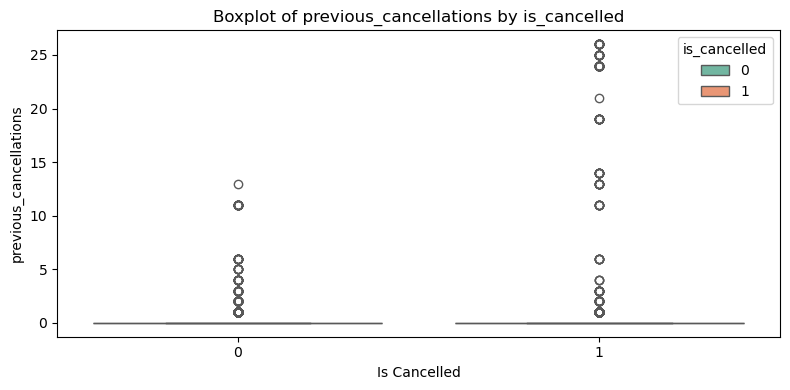

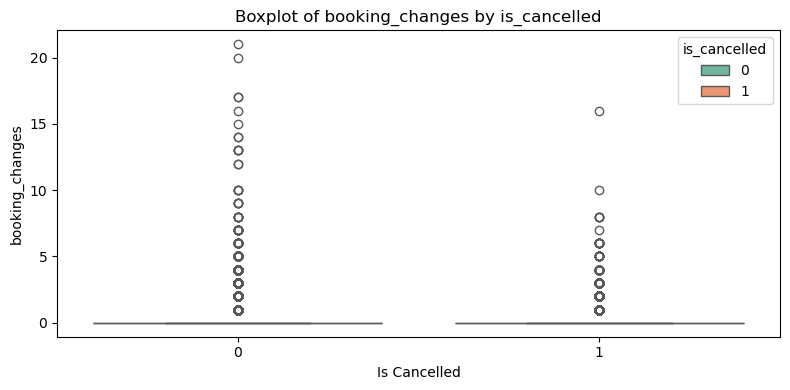

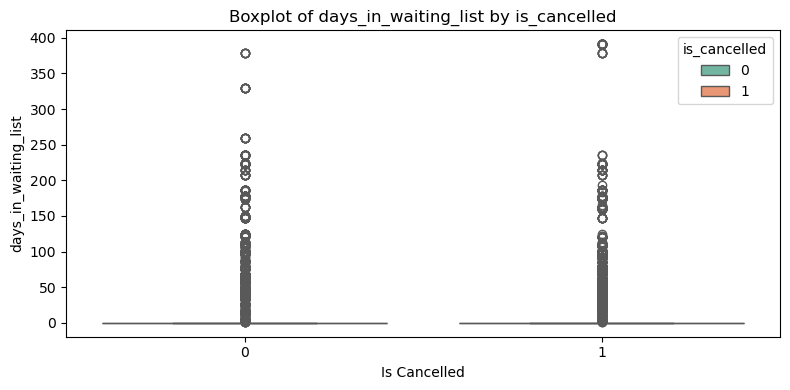

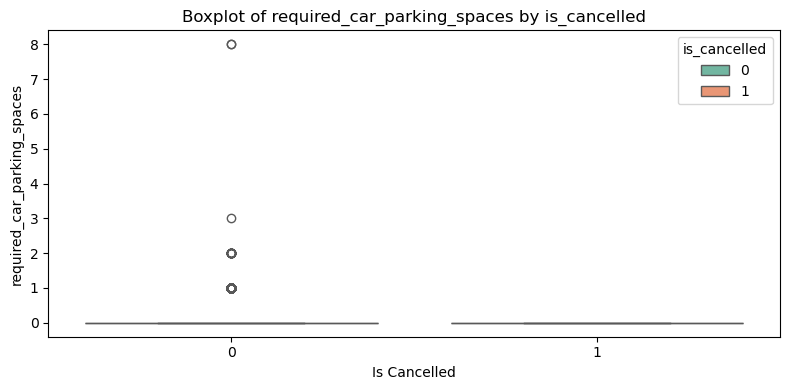

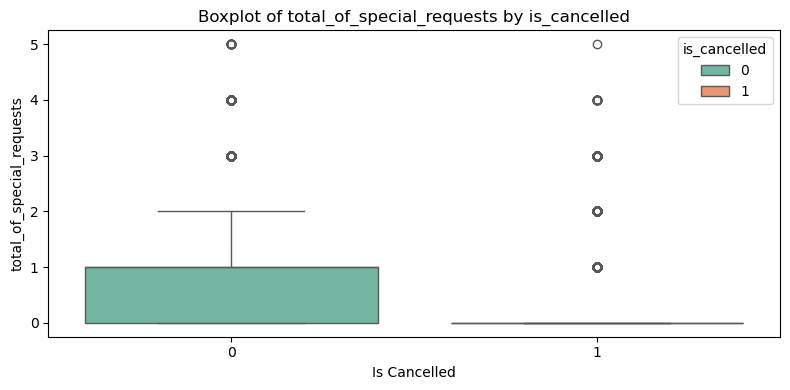

In [42]:
num_cols = df.select_dtypes(include='number').drop(columns='is_canceled').columns

# Buat boxplot untuk tiap kolom numerik dengan hue target
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='is_canceled', y=col, hue='is_canceled', palette='Set2')
    plt.title(f'Boxplot of {col} by is_cancelled')
    plt.xlabel('Is Cancelled')
    plt.ylabel(col)
    plt.legend(title='is_cancelled')
    plt.tight_layout()
    plt.show()

The dataset exhibits a large number of outliers across multiple numerical features. This is clearly visible from the boxplots, where many data points lie far beyond the whiskers of the plots. Such extreme values may represent unusual booking behaviors or data entry errors. If not treated properly, these outliers could negatively affect the performance and generalization ability of machine learning models. Therefore, careful outlier detection and handling are essential steps in the data preprocessing pipeline.

## 3.2 Numerical Data Correlation

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000,-0.073,0.120,-0.044,-0.128,0.270
booking_changes,-0.073,1.000,-0.017,0.078,0.044,-0.185
days_in_waiting_list,0.120,-0.017,1.000,-0.044,-0.125,0.101
required_car_parking_spaces,-0.044,0.078,-0.044,1.000,0.088,-0.197
total_of_special_requests,-0.128,0.044,-0.125,0.088,1.000,-0.259
is_canceled,0.270,-0.185,0.101,-0.197,-0.259,1.000


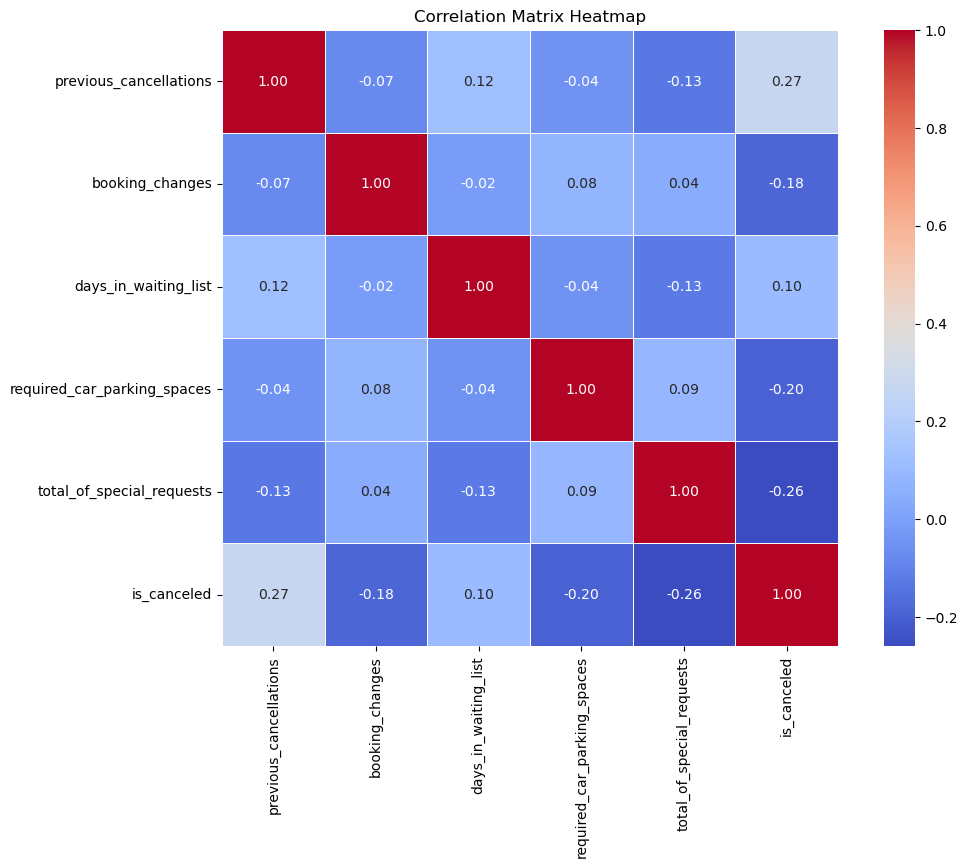

In [43]:
# Memilih hanya kolom numerik
numerical_features = df.select_dtypes(include='number')

# Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_features.corr(method='spearman')

# Menampilkan tabel korelasi
display(correlation_matrix)

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 🔍 Correlation Insights from the Heatmap

- **total_of_special_requests** has the strongest (negative) correlation with **is_canceled** (-0.26).  
  This suggests that guests who make more special requests are less likely to cancel their bookings, possibly indicating a higher intent to follow through.

- **required_car_parking_spaces** also has a negative correlation with **is_canceled** (-0.20).  
  Guests who request parking are more likely to show up, likely because they are arriving by car and have planned their trip more thoroughly.

- **booking_changes** is negatively correlated with cancellations (-0.18).  
  This might imply that guests who adjust their bookings are more committed and less likely to cancel.

- **previous_cancellations** shows a slight positive correlation with **is_canceled** (0.27).  
  Guests with a history of cancellations are more likely to cancel again, though the correlation is weak.

- Other features such as **days_in_waiting_list** have minimal or negligible correlation with cancellations, indicating limited predictive power individually.


## 3.3 Categorical Data Frequency

is_canceled,0,1
market_segment,,
Aviation,130,35
Complementary,438,73
Corporate,3106,686
Direct,7551,1347
Groups,5309,8412
Offline TA/TO,11234,5791
Online TA,25027,14433
Undefined,0,1


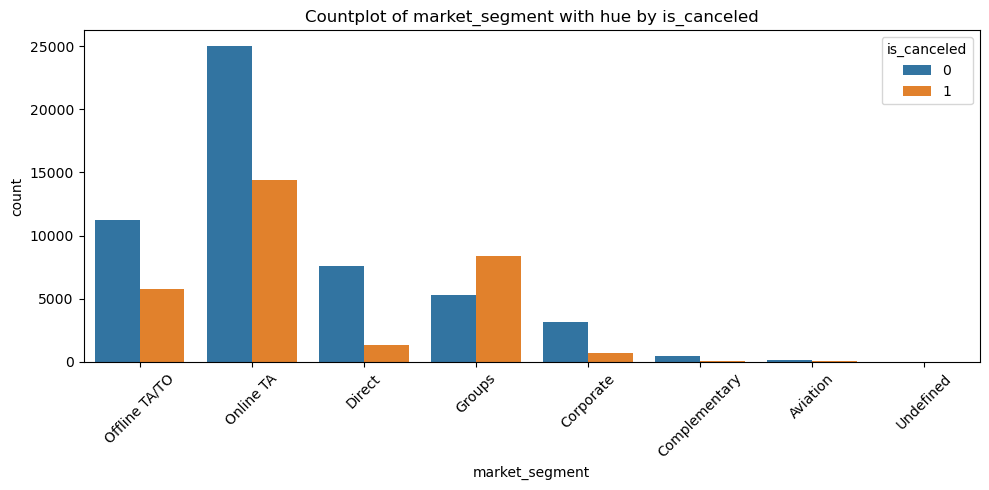

is_canceled,0,1
deposit_type,,
No Deposit,52645,20707
Non Refund,63,10048
Refundable,87,23


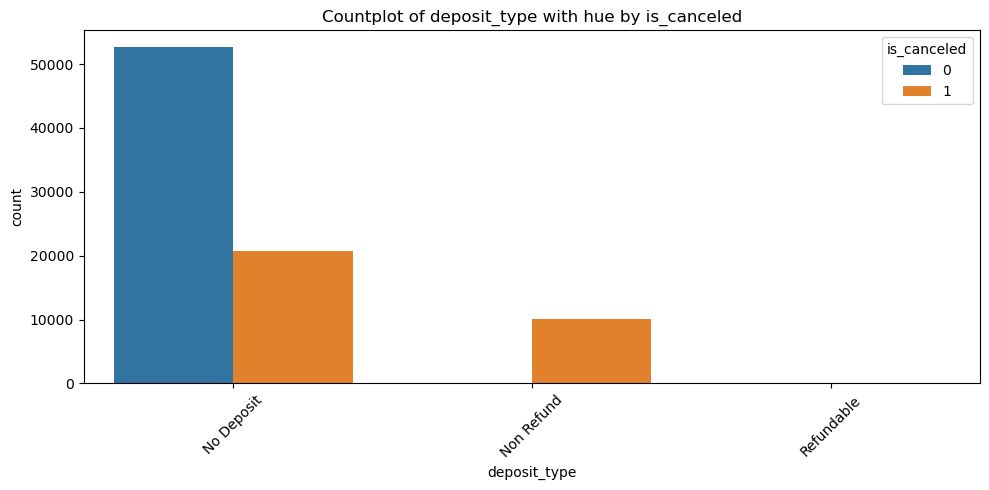

is_canceled,0,1
customer_type,,
Contract,1997,885
Group,382,41
Transient,37366,25366
Transient-Party,13050,4486


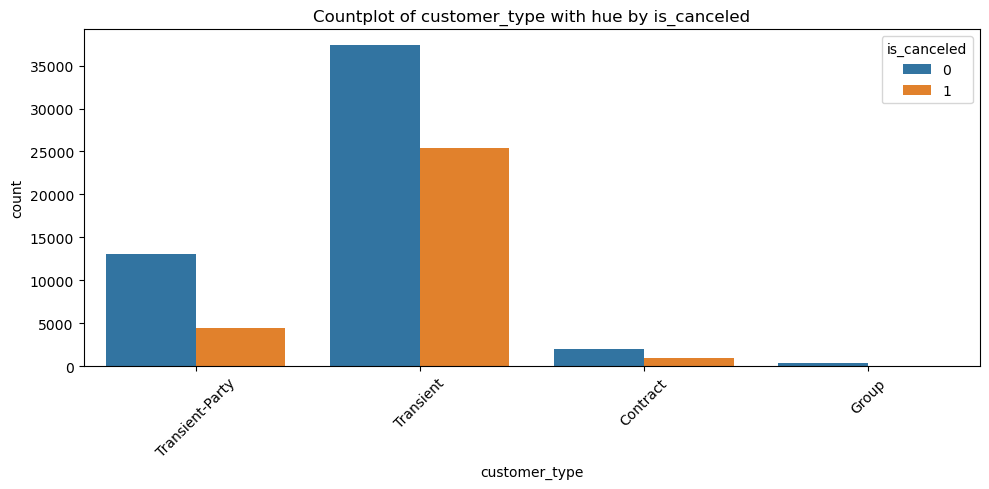

is_canceled,0,1
reserved_room_type,,
A,36649,23392
B,532,255
C,460,213
D,9257,4269
E,3298,1351
F,1431,606
G,928,519
H,238,163
L,2,1


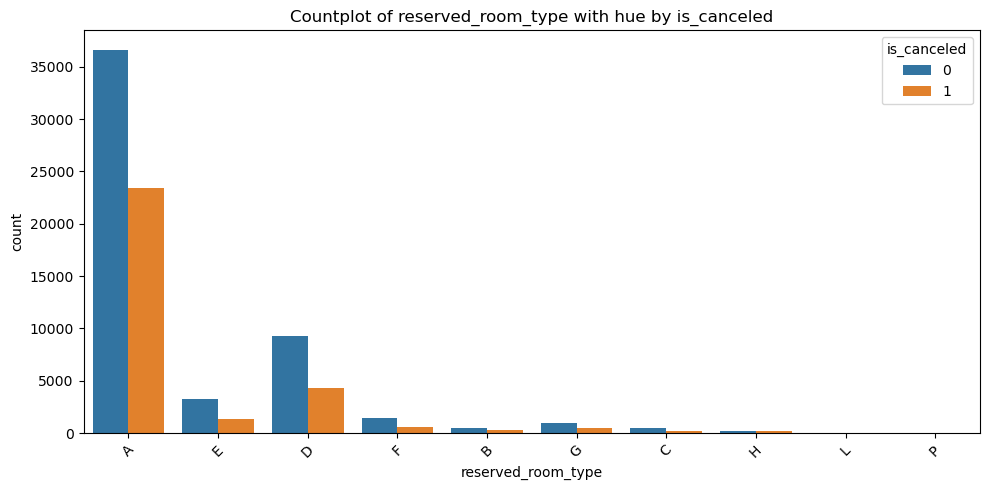

In [44]:

# Loop hanya kolom kategorikal object/category
for col in df.select_dtypes(include=['object', 'category']).columns:
    if col == 'country':
        continue

    # Tampilkan tabel groupby sebelum barplot
    group_data = df.groupby([col, 'is_canceled']).size().unstack(fill_value=0)
    display(group_data)

    # Plot barplot
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='is_canceled')
    plt.title(f'Countplot of {col} with hue by is_canceled')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 📊 Insights from Market Segment, Deposit Type, and Customer Type Cancellation Data

### 1. **Dominant Market Segments**
- **Online Travel Agencies (Online TA)** are the largest segment, with **39,460 total bookings** (25,027 non-canceled + 14,433 canceled).
- **Offline TA/TO** follows with **17,025 bookings**, and **Direct bookings** are third with **8,898 bookings**.

### 2. **Cancellation Rates by Market Segment**
| Market Segment    | Total Bookings | Cancellations | Cancellation Rate |
|-------------------|----------------|---------------|-------------------|
| Online TA         | 39,460         | 14,433        | **36.57%**        |
| Offline TA/TO     | 17,025         | 5,791         | 34.02%            |
| Direct            | 8,898          | 1,347         | 15.14%            |
| Groups            | 13,721         | 8,412         | **61.29%** 🔺     |
| Corporate         | 3,792          | 686           | 18.09%            |
| Complementary     | 511            | 73            | 14.29%            |
| Aviation          | 165            | 35            | 21.21%            |
| Undefined         | 1              | 1             | 100% (outlier)    |

> 🔍 **Insight:** The **Groups** segment has the highest cancellation rate (**61.29%**), indicating that group bookings tend to be more volatile and at higher risk of cancellation.

---

### 3. **Cancellation by Deposit Type**
| Deposit Type   | Total Bookings | Cancellations | Cancellation Rate |
|----------------|----------------|---------------|-------------------|
| No Deposit     | 73,352         | 20,707        | **28.23%**        |
| Non Refund     | 10,111         | 10,048        | **99.38%** 🔺     |
| Refundable     | 110            | 23            | 20.91%            |

> 🔍 **Insight:** **Non Refund** bookings have an almost perfect cancellation rate (**99.38%**), suggesting that this type might be used for special cases (e.g., dummy or placeholder bookings), rather than genuine customer activity.

---

### 4. **Cancellation by Customer Type**
| Customer Type      | Total Bookings | Cancellations | Cancellation Rate |
|--------------------|----------------|---------------|-------------------|
| Transient          | 62,732         | 25,366        | **40.43%** 🔺     |
| Transient-Party    | 17,536         | 4,486         | 25.58%            |
| Contract           | 2,882          | 885           | 30.71%            |
| Group              | 423            | 41            | 9.70%             |

> 🧭 **Insight:** **Transient customers** account for the majority of both volume and cancellations. Interestingly, the **Group customer type** shows the lowest cancellation rate, contrary to the common assumption that groups are the most unstable.

---

### 5. **High-Risk Segments**
- **Online TA** and **Transient customers** contribute the most to total volume and cancellations.
- **Group bookings** (as a *market segment*) are highly risky, but **Group customer type** appears stable — indicating a need to differentiate between group *source* and group *intent*.
- **Non Refund** bookings are unreliable and may point to data anomalies or abuse patterns.

> 🎯 **Risk Mitigation Strategies:**
- Introduce verification for **Non Refund bookings** to filter out possible dummy entries.
- Offer flexible plans for **Transient customers** with better segmentation (e.g., by lead time, booking channel).
- Review booking policies for **Online TA** and **Group segments** to reduce revenue loss due to high cancellation rates.

---

### 6. **Stable Segments**
- **Direct bookings**, **Corporate clients**, and **Refundable deposits** show lower cancellation rates.
- **Group customers** (by customer type) are surprisingly stable despite assumptions about group volatility.

> ✅ **Recommendation:** Focus retention and loyalty strategies on:
- **Direct** booking channels
- **Corporate** and **Group** customer types
- Transactions with **Refundable** or **No Deposit** types, while continuing to assess risk patterns.

---

### 📌 Conclusion
A well-rounded analysis of **market segments**, **deposit types**, and **customer types** offers deeper understanding of cancellation behaviors. It is critical to:
- Balance between booking volume and revenue stability.
- Tailor marketing and operational decisions to actual cancellation patterns.
- Leverage data-driven approaches to boost reliability and profitability in the hospitality sector.


# 4. Data Preprocessing
---

## 4.1 Feature Engineering

- During the feature engineering process, we grouped the country variable into two categories: "Portugal" and "Other."
- This transformation addresses the issue of high cardinality, where the number of unique country values could hinder model performance and interpretability.
- By reducing the number of categories, we simplify the data, making it more suitable for models that are sensitive to categorical feature complexity.
- Since the dataset is heavily centered on Portugal, maintaining it as a separate category preserves meaningful information.
- All other countries are grouped under "Other" to minimize noise from sparsely represented values.

Updated country distribution: 
country
Other       49476
Portugal    34097
Name: count, dtype: int64


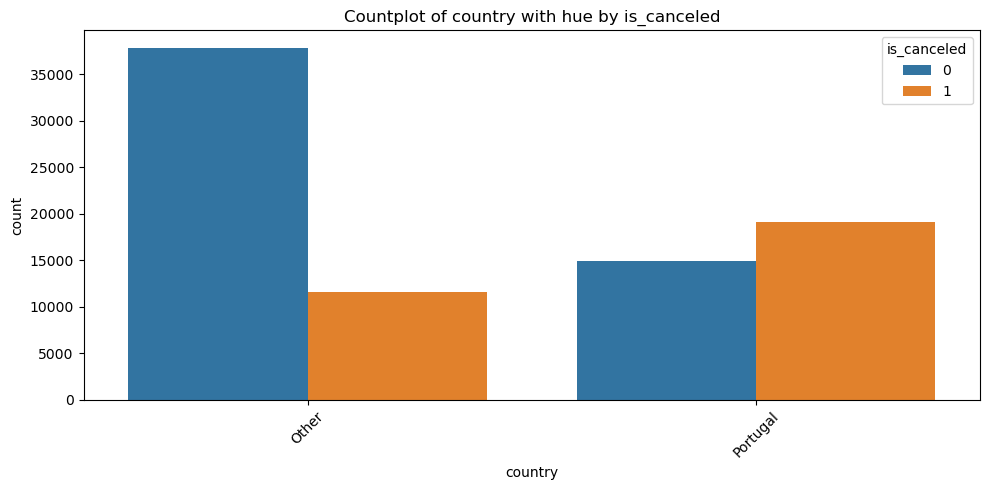

In [45]:
# calculate distribution value in column 'country'
country_distribution = df['country'].value_counts()

# calculate percentage of data from Portugal
portugal_percentage = (df['country'].value_counts(normalize=True)['PRT']) * 100

df['country'] = df['country'].fillna('Other')
df['country'] = np.where(df['country'] == 'PRT', 'Portugal', 'Other')

# Display the difference
country_counts = df['country'].value_counts()

# Output
print(f"Updated country distribution: \n{country_counts}")

# Tampilkan tabel groupby sebelum barplot

# Plot barplot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='country', hue='is_canceled')
plt.title(f'Countplot of country with hue by is_canceled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.2 Encoding


- For other categorical features, we applied one-hot encoding with the drop_first parameter to avoid multicollinearity in the model.
- This method allows us to convert categorical variables into a binary format while reducing redundancy.
- However, the `reserved_room_type` feature was encoded using ordinal encoding.
- The ordinal values were assigned based on alphabetical order, as there's no inherent ranking in the categories.
- This approach helps retain a compact feature space while still allowing the model to process the categorical information.

In [46]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder

# Encoding categorical column using One-Hot Encoding
col_category = ['country', 'market_segment', 'deposit_type', 'customer_type']
onehot_encode = OneHotEncoder(drop='first', sparse_output=False)
data_onehot = onehot_encode.fit_transform(df[col_category])
df_onehot = pd.DataFrame(data_onehot, columns=onehot_encode.get_feature_names_out(col_category))

# Encoding ordinal columns 
col_ordinal = 'reserved_room_type'
ordinal_encode = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
encoder_ord = OrdinalEncoder(categories=[ordinal_encode])
data_ord = encoder_ord.fit_transform(df[[col_ordinal]])
df_ordi = pd.DataFrame(data_ord, columns=['reserved_room_type_ord'])

# Combining encoding results with original DataFrame
df_encoded = pd.concat([df.drop(columns=col_category + [col_ordinal]), df_onehot, df_ordi], axis=1)

# Display final result
print(f"{df_encoded.columns}")

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled', 'country_Portugal', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_ord'],
      dtype='object')


In [47]:
df_encoded

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Portugal,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_ord
0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0,0,0,0,2,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,0,1,0,0,2,0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0,0,0,0,1,1,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,0,2,0,0,2,0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,0,0,0,0,3,1,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
83569,0,0,0,0,2,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000
83570,0,1,0,0,3,0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000
83571,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


## 4.3 Define X and y, Train-Test Split


- To prepare the data for modeling, we defined X as the set of independent variables (features) and y as the target variable (label) 🎯.
- This separation ensures that the model learns patterns from inputs (X) to predict the desired output (y) 🔍.
- We then performed a train-test split to divide the dataset into training and testing sets 🧪.
- The training set is used to build the model, while the test set evaluates its performance on unseen data 🚀.
- This step is essential to check for overfitting and ensure the model generalizes well 📊.

In [48]:
X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0, 
                                                    stratify=y, 
                                                    test_size=0.3)

# 5. Model Benchmark
---

## 5.1 Model Definition and Description

1. Logistic Regression

**Description**:  
Logistic Regression is a linear model used for binary classification tasks. It models the probability that a given input belongs to a certain class using the sigmoid function.

**Use Case**: Predicting whether a hotel booking will be canceled (yes/no).

**Visualization**:

![Logistic Regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png)

---

2. K-Nearest Neighbors (KNN)

**Description**:  
KNN is a non-parametric algorithm that classifies a data point based on how its neighbors are classified. The majority vote among the k-nearest neighbors determines the class.

**Use Case**: Classifying customer types based on their past booking behavior.

**Visualization**:

![KNN](https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png)

---

3. Decision Tree

**Description**:  
A Decision Tree splits the data into branches using feature values, creating a tree structure that is easy to interpret.

**Use Case**: Identifying rules behind booking cancellations.

**Visualization**:

![Decision Tree](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

---

4. Random Forest

**Description**:  
Random Forest is an ensemble of decision trees where each tree is trained on a bootstrap sample with feature randomness. It improves accuracy and reduces overfitting.

**Use Case**: Robust classification of bookings based on many customer features.

**Visualization**:

![Random Forest](https://media.geeksforgeeks.org/wp-content/uploads/20240701170624/Random-Forest-Algorithm.webp)

---

5. AdaBoost

**Description**:  
AdaBoost (Adaptive Boosting) combines multiple weak learners (usually decision stumps) into a strong classifier by focusing more on previously misclassified samples.

**Use Case**: Improving classification performance on imbalanced booking data.

**Visualization**:

![AdaBoost](https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png)

---

6. Gradient Boosting

**Description**:  
Gradient Boosting builds models sequentially, each trying to correct the errors of its predecessor. It optimizes a loss function using gradient descent.

**Use Case**: Capturing complex patterns in booking cancellation data.

**Visualization**:

![Gradient Boosting](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)

---

7. LightGBM (LGBM)

**Description**:  
LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed for speed and efficiency, especially on large datasets.

**Use Case**: Fast and accurate prediction in high-volume booking datasets.

**Visualization**:

![LightGBM](https://www.researchgate.net/publication/358563324/figure/fig2/AS:11431281095008810@1667704077432/Illustration-of-use-of-node-centralities-with-the-LGBM-classifier.png)

---

 8. XGBoost

**Description**:  
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that includes regularization, parallel processing, and handling of missing values.

**Use Case**: High-performance prediction for booking cancellation classification.

**Visualization**:

![XGBoost](https://miro.medium.com/v2/resize:fit:850/1*2UV8DrF8wbE7PIiYiiSW5w.png)

---


## 5.2 No Sampling Method

In [50]:
def cross_val(X_train, y_train, models, metric):
    results = []

    for name, model in models:
        pipe_model = Pipeline([
            ('scaler', RobustScaler()) if name == 'KNN' else ('dummy', 'passthrough'),
            ('model', model)
        ])
        
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        model_cv = cross_validate(pipe_model, X_train, y_train, cv=skfold, scoring=metric)

        results.append({
            'model': name,
            f'mean {metric}': np.mean(model_cv['test_score']),
            'std': np.std(model_cv['test_score']),
            'fit time': np.mean(model_cv['fit_time']),
            'score time': np.mean(model_cv['score_time']),
            f'{metric}': np.round(model_cv['test_score'], 3)
        })
    
    result_df = pd.DataFrame(results)
    return result_df.sort_values(f'mean {metric}', ascending=False)

models = [
    ('Logistic Regression', LogisticRegression(random_state=0, solver='liblinear')),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=5)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('Light GBM', LGBMClassifier(verbose = -1, random_state=0)),
    ('Xgboost', XGBClassifier(random_state=0))
]

# Metric definition
scoring_f2 = make_scorer(fbeta_score, beta=2)

# Benchmark
X_train = df_encoded.drop(['is_canceled'], axis=1)
y_train = df_encoded['is_canceled']
benchmark_results = cross_val(X_train, y_train, models, scoring_f2)

benchmark_df = pd.DataFrame(benchmark_results)

# Dynamically get the column name for the mean fbeta_score
mean_fbeta_col = [col for col in benchmark_results.columns if 'mean' in col and 'fbeta_score' in col][0]
# Rename the column for clarity
benchmark_results = benchmark_results.rename(columns={mean_fbeta_col: 'mean fbeta_score'})
# Reorder the columns
benchmark_results = benchmark_results[['model', 'mean fbeta_score', 'std', 'fit time', 'score time']]
benchmark_results = benchmark_results.set_index('model')
benchmark_results = benchmark_results.sort_values('mean fbeta_score', ascending=False)
benchmark_results

,mean fbeta_score,std,fit time,score time
model,,,,
Random Forest,0.715,0.010,1.301,0.089
Xgboost,0.707,0.009,0.113,0.010
Light GBM,0.706,0.009,0.152,0.021
Gradient Boosting,0.681,0.005,1.737,0.019
KNN,0.675,0.037,0.032,0.716
Decision Tree,0.637,0.003,0.026,0.004
AdaBoost,0.591,0.004,0.600,0.027
Logistic Regression,0.574,0.006,0.179,0.005


,f2 score,auc roc,precision,recall
model,,,,
Random Forest,0.725,0.794,0.765,0.716
Xgboost,0.712,0.788,0.769,0.699
Light GBM,0.708,0.787,0.771,0.694
KNN,0.705,0.750,0.658,0.718
Gradient Boosting,0.679,0.776,0.785,0.657
Decision Tree,0.637,0.754,0.778,0.610
AdaBoost,0.587,0.732,0.785,0.553
Logistic Regression,0.570,0.726,0.794,0.532


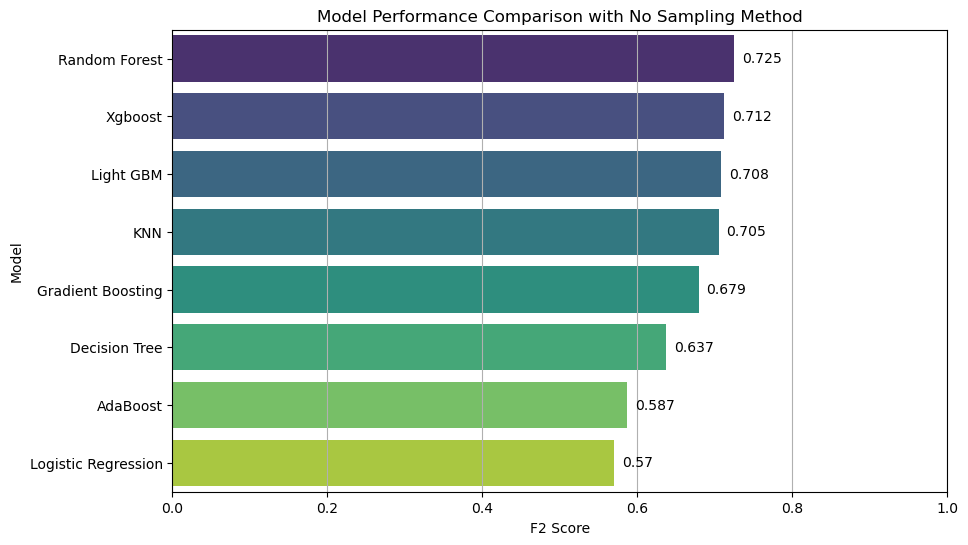

In [51]:
list_model = []
list_f2 = []
list_roc_auc = []
list_precision = []
list_recall = []

# Loop for every model
for name, model in models:
    # Pipeline with scaler for KNN
    if name == 'KNN':
        pipe_model = Pipeline([
            ('scaler', RobustScaler()),
            ('model', model)
        ])
    else:
        pipe_model = Pipeline([
            ('model', model)
        ])
    
    # Train model
    pipe_model.fit(X_train, y_train)

    # Prediction and evaluation
    y_pred = pipe_model.predict(X_test)

    # Save evaluation result
    list_model.append(name)
    list_f2.append(round(fbeta_score(y_test, y_pred, beta=2), 3))
    list_roc_auc.append(round(roc_auc_score(y_test, y_pred), 3))
    list_precision.append(round(precision_score(y_test, y_pred), 3))
    list_recall.append(round(recall_score(y_test, y_pred), 3))

# Display test result
results_df = pd.DataFrame({
    'model': list_model,
    'f2 score': list_f2,
    'auc roc': list_roc_auc,
    'precision': list_precision,
    'recall': list_recall
}).sort_values('f2 score', ascending=False)

results_df = results_df.set_index('model')
display(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='f2 score', y=results_df.index, palette='viridis')

# Add value labels on the bars
for i, v in enumerate(results_df['f2 score']):
    plt.text(v + 0.01, i, str(v), color='black', va='center')
# Set the title and labels
plt.title('Model Performance Comparison with No Sampling Method')
plt.xlabel('F2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()


> Insight

1. Among all tested models, Random Forest achieved the highest F2 score at 0.725, outperforming XGBoost (0.712) and LightGBM (0.708), making it the top choice for recall-focused tasks.
2. The F2 score prioritizes recall over precision, which is essential in this business case to minimize costly false negatives (missed cancellations)[7].
3. Random Forest also delivered a strong balance in AUC ROC (0.794) and recall (0.716), confirming its robust predictive capability across key metrics.
4. Other models like KNN and Gradient Boosting showed lower F2 scores, indicating less effectiveness for the primary business objective.
5. Based on this benchmark, Random Forest is the most reliable model for predicting hotel booking cancellations when recall and F2 score are the main priorities.


In [52]:
rf = RandomForestClassifier(random_state=0)

# Define the pipeline
pipe_model = Pipeline([
                ('algo', rf)
            ])
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     15839
           1       0.76      0.72      0.74      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.79      0.80     25072
weighted avg       0.81      0.81      0.81     25072



## 5.3 Use Sampling Method

In [53]:
def cross_val(X_train, y_train, models, metric):
    list_name = []
    list_mean = []
    list_std = []
    cross_val = []

    for name, model in models:
        if name == 'KNN':
            pipe_model = Pipeline([
                ('resampling', RandomOverSampler(random_state=0)),
                ('scaler', RobustScaler()),
                ('algo', model)
            ])
        else:
            pipe_model = Pipeline([
                ('resampling', RandomOverSampler(random_state=0)),
                ('algo', model)
            ])

        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring=make_scorer(metric)
        )

        metric_name = metric.__name__ if callable(metric) else metric
        
        list_name.append(name)
        list_mean.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        cross_val.append(np.round_(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'model': list_name,
        f'mean {metric_name}': list_mean,
        'std': list_std,
        f'{metric_name}': cross_val
    })

    return result.sort_values(f'mean {metric_name}', ascending=False)


In [54]:
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0, verbose = -1)
xgboost = XGBClassifier(random_state=0)

# List of models to evaluate
models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
]

# List of numeric and categorical features, if any
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train and evaluate every model
list_model = []
list_f2 = []
list_roc_auc = []
list_precision = []
list_recall = []

for name, model in models:
    if name == 'KNN':
        pipe_model = ImbPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])
    else:
        pipe_model = ImbPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])
    
    # Train model
    pipe_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = pipe_model.predict(X_test)

    # Calculate evaluation metrics
    f2 = round(fbeta_score(y_test, y_pred, beta=2), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    
    # ROC AUC only if model has metode predict_proba
    if hasattr(pipe_model.named_steps['algo'], 'predict_proba'):
        roc_auc = round(roc_auc_score(y_test, pipe_model.predict_proba(X_test)[:, 1]), 3)
    else:
        roc_auc = "N/A"

    list_model.append(name)
    list_f2.append(f2)
    list_roc_auc.append(roc_auc)
    list_precision.append(precision)
    list_recall.append(recall)

# Display evaluation result
results_df = pd.DataFrame({
    'model': list_model,
    'f2 score': list_f2,
    'roc auc': list_roc_auc,
    'precision': list_precision,
    'recall': list_recall
}).sort_values('f2 score', ascending=False)

pd.options.display.float_format = '{:.3f}'.format
results_df = results_df.set_index('model')
results_df = results_df[['f2 score', 'roc auc', 'precision', 'recall']]
results_df



,f2 score,roc auc,precision,recall
model,,,,
Random Forest,0.765,0.895,0.713,0.779
Xgboost,0.760,0.891,0.711,0.773
Light GBM,0.759,0.891,0.710,0.772
Gradient Boosting,0.750,0.884,0.708,0.761
Logistic Regression,0.726,0.859,0.688,0.736
AdaBoost,0.709,0.865,0.696,0.713
KNN,0.707,0.837,0.658,0.720
Decision Tree,0.687,0.859,0.718,0.679


In [55]:
# Define resampling methods
resampling_methods = {
    'No Resampling': None,
    'Random Oversampling': RandomOverSampler(random_state=0),
    'SMOTE': SMOTE(random_state=0),
    'Random Undersampling': RandomUnderSampler(random_state=0)
}

# Prepare dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Collect results
results = []

for resampling_name, resampler in resampling_methods.items():
    # Apply resampling
    X_res, y_res = resampler.fit_resample(X_train, y_train) if resampler else (X_train, y_train)

    for name, model in models:
        # Pipeline: apply scaling only for KNN
        if name == 'KNN':
            pipe = Pipeline([
                ('scaler', RobustScaler()),
                ('model', model)
            ])
        else:
            pipe = model

        # Fit
        pipe.fit(X_res, y_res)

        # Predict
        y_pred = pipe.predict(X_test)

        # Evaluation metrics
        f2 = round(fbeta_score(y_test, y_pred, beta=2), 3)
        roc_auc = round(roc_auc_score(y_test, y_pred), 3)
        precision = round(precision_score(y_test, y_pred), 3)
        recall = round(recall_score(y_test, y_pred), 3)

        # Append result
        results.append({
            'Resampling Method': resampling_name,
            'Model': name,
            'F2 Score': f2,
            'Precision': precision,
            'Recall': recall,
        })

# Create and sort result DataFrame
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='F2 Score', ascending=False)

# Display all results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("All Results:")
    print(results_df_sorted)

All Results:
       Resampling Method                Model  F2 Score  Precision  Recall
27  Random Undersampling        Random Forest     0.755      0.697   0.771
18                 SMOTE        Decision Tree     0.753      0.648   0.784
26  Random Undersampling        Decision Tree     0.753      0.648   0.784
10   Random Oversampling        Decision Tree     0.753      0.648   0.784
15   Random Oversampling              Xgboost     0.752      0.706   0.764
22                 SMOTE            Light GBM     0.751      0.708   0.762
11   Random Oversampling        Random Forest     0.751      0.706   0.763
19                 SMOTE        Random Forest     0.751      0.706   0.764
30  Random Undersampling            Light GBM     0.750      0.708   0.762
23                 SMOTE              Xgboost     0.750      0.708   0.761
31  Random Undersampling              Xgboost     0.749      0.708   0.761
14   Random Oversampling            Light GBM     0.748      0.710   0.759
21          

> Insight

1. Resampling Techniques Significantly Improve Model Performance

    Models trained with resampling methods (SMOTE, Random Oversampling, and Random Undersampling) consistently achieved higher F2 Scores compared to models trained without resampling. This highlights the effectiveness of addressing class imbalance in improving model recall and F2 score, especially important for imbalanced classification problems.
2. Random Forest with Undersampling Achieved the Best Overall F2 Score

    The highest F2 score of 0.755 was achieved using the Random Forest model combined with Random Undersampling, indicating a strong balance between precision and recall. This combination is particularly effective in capturing the minority class.
3. Tree-Based Models Benefit the Most from Resampling

    Decision Tree, Random Forest, LightGBM, and XGBoost models all showed marked improvements when resampling was applied. For example, Decision Tree’s F2 score increased from 0.632 (no resampling) to 0.753 (with SMOTE or oversampling).
4. Logistic Regression and AdaBoost Underperformed Without Resampling

    Both models had the lowest F2 scores in the absence of resampling (e.g., Logistic Regression: 0.568, AdaBoost: 0.585), despite having high precision. This indicates poor recall, making them less reliable for correctly identifying the positive class.
5. High Precision Does Not Guarantee Good F2 Score

    The KNN model with undersampling had the highest precision (0.958) but the lowest F2 score (0.431) due to extremely low recall. This reinforces that F2 score is a better metric in this context, as it emphasizes recall more heavily—crucial when false negatives are more costly.

## 5.4 Best Model for Tuning

🌟 After evaluating all models, **Random Forest with Random Undersampling** achieved the highest F2 score (0.755), indicating the best balance between precision and recall. 💡 This makes it the top-performing model for our classification task. 🚀 We will proceed with hyperparameter tuning using Random Forest to further optimize its performance.

# 6. Hyperparameter Tuning
---


## 6.1 `RandomUnderSampler` Tuning

In [84]:
# Apply RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


# Define model and parameter grid
pipe_model = ImbPipeline([
    ('scaler', RobustScaler()), 
    ('classifier', RandomForestClassifier(random_state=42)) 
])

hyperparam_space = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    # Additional parameters to tune
}

# Define scoring metric
scorer = make_scorer(fbeta_score, beta=2)

# Setup GridSearchCV
rf_tuning = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV on resampled data
rf_tuning.fit(X_train_resampled, y_train_resampled)

# Display best parameters and score
print('RandomForestClassifier with RandomUnderSampler')
print(f"Best Parameters: {rf_tuning.best_params_}")
print(f"Best Score: {rf_tuning.best_score_}")

# Evaluate on test set
best_model = rf_tuning.best_estimator_
y_pred = best_model.predict(X_test)


RandomForestClassifier with RandomUnderSampler
Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Best Score: 0.7812295720671795


## 6.2 `SMOTE` Tuning

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Define model and parameter grid
pipe_model = ImbPipeline([
    ('scaler', RobustScaler()),  
    ('classifier', RandomForestClassifier(random_state=42)) 
])

hyperparam_space = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

# Define scoring metric
scorer = make_scorer(fbeta_score, beta=2)

# Setup GridSearchCV
rf_tuning = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV on resampled data
rf_tuning.fit(X_train_resampled, y_train_resampled)

# Display best parameters and score
print('RandomForestClassifier with SMOTE')
print(f"Best Parameters: {rf_tuning.best_params_}")
print(f"Best Score: {rf_tuning.best_score_}")

# Evaluate on test set
best_model = rf_tuning.best_estimator_
y_pred = best_model.predict(X_test)


RandomForestClassifier with SMOTE
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best Score: 0.7878810610246345


> Insight

1. RandomForestClassifier with SMOTE sampling and hyperparameter tuning achieved a higher F2 score (0.788) on the training data compared to RandomForest with RandomUnderSampler (0.781).
2. This improvement demonstrates that SMOTE is more effective in handling the class imbalance present in the dataset, where the canceled bookings ratio is only 0.37 versus 0.63 for non-canceled.
3. SMOTE generates synthetic samples for the minority class, allowing the model to better learn patterns related to cancellations without discarding valuable data.
4. In contrast, RandomUnderSampler reduces the majority class, which can lead to information loss and slightly lower model performance.
5. Therefore, for imbalanced hotel booking data, RandomForest with SMOTE and proper hyperparameter tuning is the preferred approach for maximizing recall-focused metrics like the F2 score.


# 7. Performance in Test
---

### Before Hyperparameter Tuning

In [85]:
model = RandomForestClassifier(random_state=42) 

# Define model and parameter grid
model_pipe = ImbPipeline([
    ('scaler', StandardScaler()),  # Normalisasi data
    ('balancing', smote),  # Resampling method
    ('classifier', model)  # Model klasifikasi
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# recall score
f2score_rf_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_rf_benchmark

0.7560286420704492

### After Hyperparameter Tuning

F2 Score after tuning (Random Forest): 0.7204176334106729

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     10601
           1       0.76      0.71      0.74      6114

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



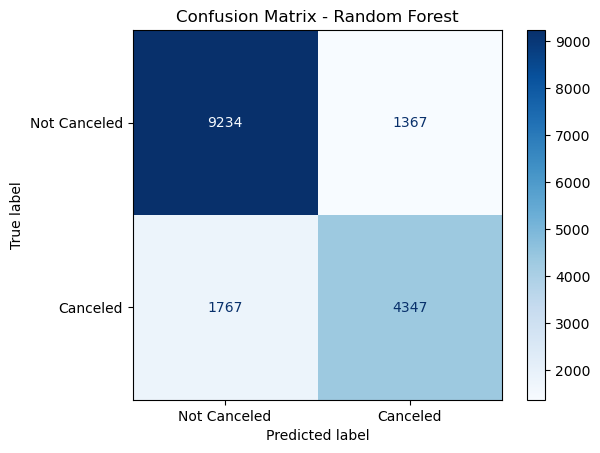

In [86]:
# Best model after tuning
rf_tuning = rf_tuning.best_estimator_  # pastikan random_rf adalah RandomizedSearchCV untuk RF

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict on test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# F2 Score
f2score_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)
print("F2 Score after tuning (Random Forest):", f2score_rf_tuning)

# Optional: Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuning))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 8. Model Final Results
---

In [60]:
print('RandomForest Before Tuning')
print(classification_report(y_test, y_pred))

RandomForest Before Tuning
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     10601
           1       0.70      0.77      0.74      6114

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.79     16715
weighted avg       0.80      0.80      0.80     16715



In [61]:
print('RandomForest After Tuning')
print(classification_report(y_test, y_pred_rf_tuning))

RandomForest After Tuning
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     10601
           1       0.76      0.71      0.73      6114

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



- 🔍 After applying hyperparameter tuning to the Random Forest model, we observed a decline in the F2 score, suggesting a drop in the model's ability to prioritize recall in line with our business goals.
- 📉 This performance drop indicates that while the model may have become more stable or generalized, it has lost some of its focus on capturing as many positive cases as possible.
- 🧠 To address this, we need to perform a feature importance analysis to understand which variables contribute most to predictions and refine the model accordingly.
- 🎯 Additionally, we should explore threshold optimization to better balance precision and recall based on the specific cost-benefit tradeoffs of our business context.
- 💼 These steps are crucial to ensure the model supports the decision-making process effectively and aligns with our ultimate business objectives.

## 8.1 Feature Importance

In [62]:
# Feature Importance
importances = rf_tuning.named_steps['classifier'].feature_importances_

# Extract feature names after transformation
transformed_columns = rf_tuning.named_steps['scaler'].get_feature_names_out()

# Create a DataFrame for feature importance
important_features = pd.DataFrame({'feature': transformed_columns, 'importance': importances})
important_features.sort_values(by='importance', ascending=False, inplace=True)
display(important_features)

,feature,importance
13,deposit_type_Non Refund,0.259
5,country_Portugal,0.160
4,total_of_special_requests,0.103
0,previous_cancellations,0.079
11,market_segment_Online TA,0.066
3,required_car_parking_spaces,0.059
1,booking_changes,0.047
9,market_segment_Groups,0.040
16,customer_type_Transient,0.039
18,reserved_room_type_ord,0.030


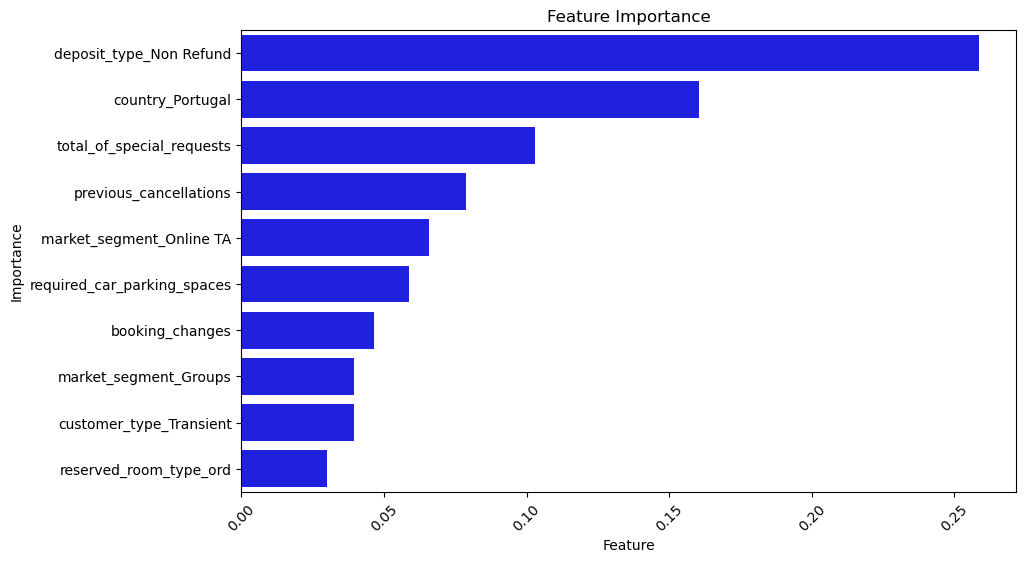

In [63]:
# tampilkan 10 feature terpenting
important_features = important_features.head(10)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.xticks(rotation=45)
# Plot the feature importance
plt.xlabel('Feature')
plt.ylabel('Importance')
# Create a bar plot
sns.barplot(data=important_features, y='feature', x='importance', color='blue');

### 📊 Feature Importance Analysis – Insights from the Random Forest Model

The chart highlights the most influential features used by the Random Forest model in predicting booking cancellations. Here's a breakdown of the top 10 features and what they reveal:

---

1. 🔐 **deposit_type_Non Refund**  
   - **Most impactful feature!**  
   - Guests who choose *non-refundable* bookings are **much more likely to cancel**.
   - This could reflect impulse bookings or guests trying to lock in lower prices without commitment.

2. 🌍 **country_Portugal**  
   - Bookings from **Portugal** show distinct behavior, potentially due to local travel habits or seasonal booking patterns.
   - Regional targeting strategies could be explored.

3. 📋 **total_of_special_requests**  
   - Guests making **more special requests** (e.g., crib, high floor, late check-in) are generally **more committed**.
   - Fewer requests may correlate with casual or tentative bookings.

4. ❌ **previous_cancellations**  
   - Strong signal of risk: guests who canceled before are **more likely to cancel again**.
   - This can be used for flagging high-risk reservations.

5. 🛒 **market_segment_Online TA**  
   - Bookings from **Online Travel Agencies (OTA)** like Expedia or Booking.com have higher cancellation tendencies.
   - This supports the need to monitor OTA-specific trends or offer direct booking incentives.

6. 🚗 **required_car_parking_spaces**  
   - Guests who **request parking** tend to be **more committed** and less likely to cancel.
   - Parking needs may indicate serious travel planning.

7. 🔄 **booking_changes**  
   - Modifications made before check-in may be an early warning for potential cancellation.
   - High frequency of changes could be monitored proactively.

8. 👥 **market_segment_Groups**  
   - Group bookings show different patterns, possibly due to **event-dependent plans** or **logistics complexity**.

9. 🧳 **customer_type_Transient**  
   - Transient guests (non-recurring, short stays) show slightly different behaviors compared to corporate or returning guests.
   - Loyalty or membership programs may reduce cancellations.

10. 🛏 **reserved_room_type_ord**  
   - Specific room types may play a role in cancellations, possibly linked to guest expectations or room availability mismatches.

---

### 📌 Summary
Understanding these feature importances helps us:
- Predict and reduce cancellations 🎯  
- Personalize guest experience 👤  
- Optimize pricing and refund policies 💵  
- Focus on valuable customer segments 🧭

By leveraging this insight, we can improve both operational efficiency and guest satisfaction. ✅


## 8.2 Threshold Optimization

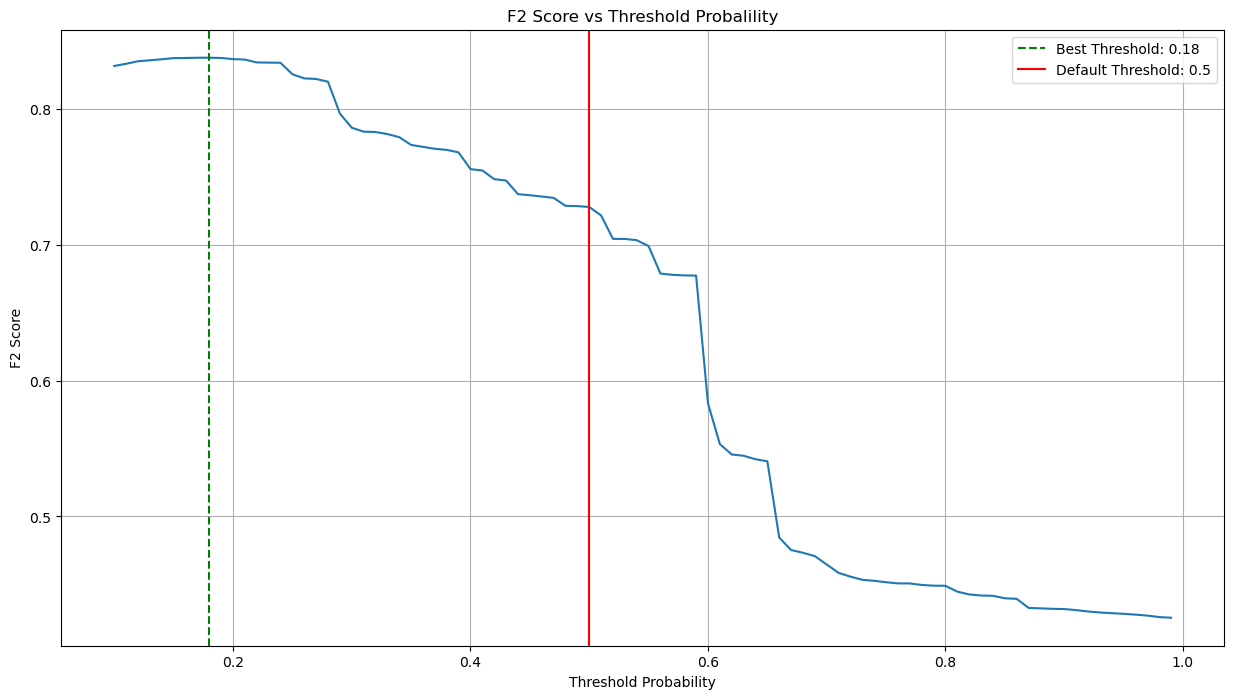

In [64]:
# Calculate the threshold values
th_value = [i/100 for i in range(10,100)]
score_list = []

# Loop through threshold values and calculate fbeta scores
for i in th_value:
    y_pred_proba = rf_tuning.predict_proba(X_train)[:, 1]
    y_pred_nt = np.where(y_pred_proba > i, 1, 0)
    score_temp = fbeta_score(y_train, y_pred_nt, beta=2)
    score_list.append(score_temp)

# Find the index of the highest score and corresponding threshold
max_index = np.argmax(score_list)
best_threshold = th_value[max_index]

# Plotting
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value, y=score_list)
plt.xlabel('Threshold Probability')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold Probalility')

# Plot a vertical line at the threshold with the highest score
plt.axvline(x=best_threshold, linestyle='--', color='green', label=f'Best Threshold: {best_threshold:.2f}')

plt.axvline(x=0.5, color='red', label=f'Default Threshold: 0.5')

# Show the plot
plt.grid()
plt.legend()
plt.show()


In [65]:
y_test.value_counts()

is_canceled
0    10601
1     6114
Name: count, dtype: int64

## 8.3 Metric Evaluation

### Threshold = 0.18

threshold probability on train data: 0.18
F2-score = 0.837
              precision    recall  f1-score   support

           0       0.96      0.53      0.69     42194
           1       0.55      0.97      0.70     24664

    accuracy                           0.69     66858
   macro avg       0.76      0.75      0.69     66858
weighted avg       0.81      0.69      0.69     66858

threshold probability on test data: 0.18
F2-score = 0.826
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     10601
           1       0.53      0.96      0.69      6114

    accuracy                           0.68     16715
   macro avg       0.74      0.74      0.68     16715
weighted avg       0.80      0.68      0.68     16715



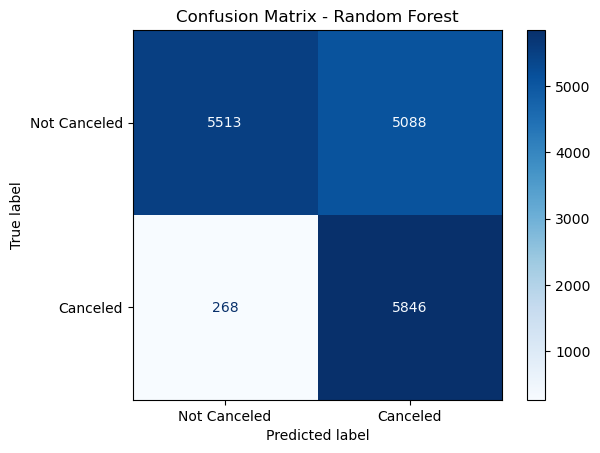

In [66]:
y_pred_train = rf_tuning.predict_proba(X_train)[:, 1]

y_pred_train = np.where(y_pred_train>best_threshold,1,0)

print(f'threshold probability on train data: {best_threshold}')
print(f'F2-score = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')

# predict on test set
y_pred_test = rf_tuning.predict_proba(X_test)[:, 1]
y_pred_test = np.where(y_pred_test>best_threshold,1,0)
print(f'threshold probability on test data: {best_threshold}')
print(f'F2-score = {round(fbeta_score(y_test,y_pred_test,beta=2),3)}\n{classification_report(y_test,y_pred_test)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Threshold = 0.25

threshold probability on train data: 0.25
F2-score = 0.825
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     42194
           1       0.60      0.91      0.72     24664

    accuracy                           0.74     66858
   macro avg       0.76      0.78      0.74     66858
weighted avg       0.80      0.74      0.74     66858

threshold probability on test data: 0.25
F2-score = 0.807
              precision    recall  f1-score   support

           0       0.91      0.63      0.74     10601
           1       0.58      0.89      0.70      6114

    accuracy                           0.73     16715
   macro avg       0.75      0.76      0.72     16715
weighted avg       0.79      0.73      0.73     16715



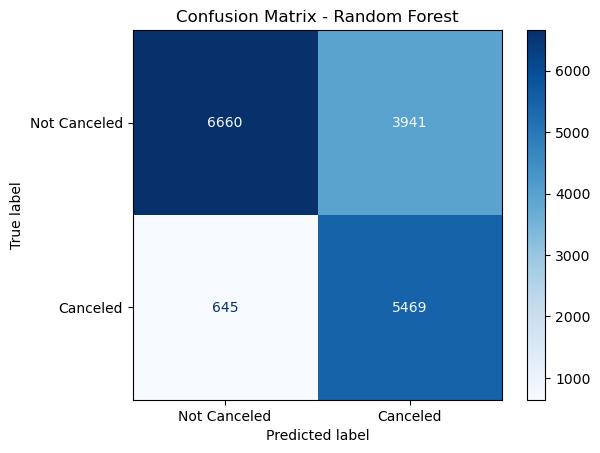

In [67]:
y_pred_train = rf_tuning.predict_proba(X_train)[:, 1]

y_pred_train = np.where(y_pred_train>0.25,1,0)

print(f'threshold probability on train data: {0.25}')
print(f'F2-score = {round(fbeta_score(y_train,y_pred_train,beta=2),3)}\n{classification_report(y_train,y_pred_train)}')

# predict on test set
y_pred_test = rf_tuning.predict_proba(X_test)[:, 1]
y_pred_test = np.where(y_pred_test>0.25,1,0)
print(f'threshold probability on test data: {0.25}')
print(f'F2-score = {round(fbeta_score(y_test,y_pred_test,beta=2),3)}\n{classification_report(y_test,y_pred_test)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

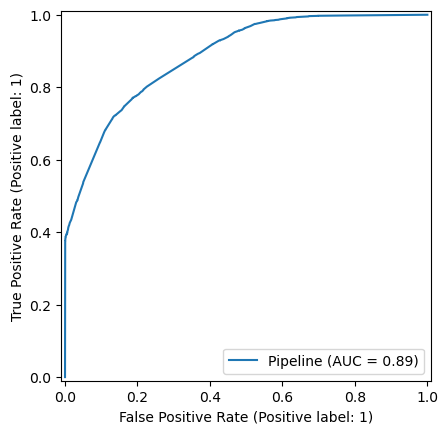

In [68]:
RocCurveDisplay.from_estimator(rf_tuning,X_test, y_test)

## 8.4 Best Final Model

🚀 The Random Forest model, after applying both hyperparameter tuning and threshold optimization, has achieved the most optimal F2-score, making it highly suitable for business implementation.

📊 With a threshold probability of 0.18, the model reached an impressive F2-score of 0.837 on training data and 0.826 on test data, emphasizing its strong ability to capture positive cases (high recall).

📈 The model demonstrates a precision of 0.53 and recall of 0.96 on the test set, indicating it effectively identifies cancellations, which is critical for our business objective of minimizing losses from no-shows.

🔧 These metrics reflect a well-balanced model that prioritizes recall while maintaining acceptable precision — aligning perfectly with our use case.

✅ With consistent performance across both training and testing sets, this tuned Random Forest model is ready to be deployed into production to support data-driven decision-making. 💼

## 8.5 💸 Cost-Benefit Analysis: Hotel Booking Cancellation Prediction

### 📋 Problem Setup

We aim to evaluate the economic impact of using a Machine Learning (ML) model to predict hotel booking cancellations.

### ✨ Initial Condition:
- **Total Actual Non-Cancelled Bookings (Class 0):** 10,601
- **Total Actual Cancelled Bookings (Class 1):** 6,114
- **Cost of False Positive (FP):** \$100 per booking  
  (penalizing incorrectly assuming a valid booking will cancel)
- **Cost of False Negative (FN):** \$500 per booking  
  (penalizing missed opportunity to prepare for a cancellation)
- **Resell Success Rate for Cancelled Bookings:** 70%  
  (applies to true positive cases)

---

### 📉 Scenario 1: Without Machine Learning

To avoid the costly risk of FN, the business assumes **all bookings will cancel**.

#### 🔍 Prediction Outcome:
- **False Positives (FP):** 10,601  
  (actual not canceled but treated as canceled)
- **True Positives (TP):** 6,114  
  (actual canceled and treated as canceled)
- **True Negative (TN) and False Negative (FN):** 0

#### ♻️ Resell Strategy:
- **70%** of TP (cancelled bookings) are successfully resold
  - **Resold bookings:** 0.7 × 6,114 = **4,280**
  - **Unresold bookings:** 0.3 × 6,114 = **1,834**

#### 💰 Cost Calculation:
| Cost Component           | Formula                     | Value       |
|--------------------------|-----------------------------|-------------|
| FP Loss                  | 10,601 × \$100              | \$1,060,100 |
| TP Unresold Loss         | 1,834 × \$500               | \$917,000   |
| **Total Loss**           |                             | **\$1,977,100** |

---

### ✅ Scenario 2: With Machine Learning

ML model predicts cancellations with the following confusion matrix:

- **True Negative (TN):** 5,513
- **False Positive (FP):** 5,088
- **False Negative (FN):** 268
- **True Positive (TP):** 5,846

#### ♻️ Resell Strategy:
- **Resold bookings:** 0.7 × 5,846 = **4,092**
- **Unresold bookings:** 0.3 × 5,846 = **1,754**

#### 💰 Cost Calculation:
| Cost Component           | Formula                     | Value       |
|--------------------------|-----------------------------|-------------|
| FP Loss                  | 5,088 × \$100               | \$508,800   |
| FN Loss                  | 268 × \$500                 | \$134,000   |
| TP Unresold Loss         | 1,754 × \$500               | \$877,000   |
| **Total Loss**           |                             | **\$1,519,800** |

---

### 🧾 Summary of Results

| Scenario            | Total Loss     |
|---------------------|----------------|
| Without ML          | \$1,977,100    |
| With ML             | \$1,519,800    |
| **Savings**         | **\$457,300**  |

---

### 📈 Cost Reduction Analysis

The ML model helps reduce total cost by:

\[
\text{Percentage Savings} = \frac{1,977,100 - 1,519,800}{1,977,100} \times 100 \approx \boxed{23.13\%}
\]

---

### ✅ Conclusion

By using a Machine Learning model to predict hotel booking cancellations:

- We can **save \$457,300** compared to a conservative no-ML strategy.
- This translates to an estimated **23.13% cost reduction**.
- The model improves decision-making by better balancing false positives and false negatives, reducing unnecessary cancellations while still mitigating the impact of actual cancellations.

This analysis justifies further investment in predictive modeling for booking management in the hotel industry.


# 9. Save Model
---

In [69]:
import joblib

# Simpan model pipeline
joblib.dump(rf_tuning, 'rf_tuned_pipeline.pkl')

# Simpan threshold dalam file terpisah (misal .pkl atau .json)
joblib.dump(best_threshold, 'rf_best_threshold.pkl')


['rf_best_threshold.pkl']

In [70]:
# Load model dan threshold
model_loaded = joblib.load('rf_tuned_pipeline.pkl')
threshold_loaded = joblib.load('rf_best_threshold.pkl')

# Predict proba & threshold
y_pred_test = model_loaded.predict_proba(X_test)[:, 1]
y_pred_test = np.where(y_pred_test > threshold_loaded, 1, 0)

# Evaluasi ulang
print(f'F2 Score: {fbeta_score(y_test, y_pred_test, beta=2)}')
print(classification_report(y_test, y_pred_test))


F2 Score: 0.8259395309409437
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     10601
           1       0.53      0.96      0.69      6114

    accuracy                           0.68     16715
   macro avg       0.74      0.74      0.68     16715
weighted avg       0.80      0.68      0.68     16715



# 10. Model Interpretation
---

In [71]:
# ambil model dan data dari pipeline
my_model = rf_tuning[-1]
my_data = rf_tuning[0].transform(X_train)


In [72]:
# ambil nama feature

feat = list(X.columns)
feat

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'country_Portugal',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'reserved_room_type_ord']

In [73]:
import lime
from lime import lime_tabular

In [74]:
# define explainer
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data= my_data,
    feature_names= feat,
    class_names=['Not Cancel', 'Canceled'],
    mode='classification'
)

In [75]:
df_prep = pd.DataFrame(rf_tuning[0].transform(X_test), columns=feat)

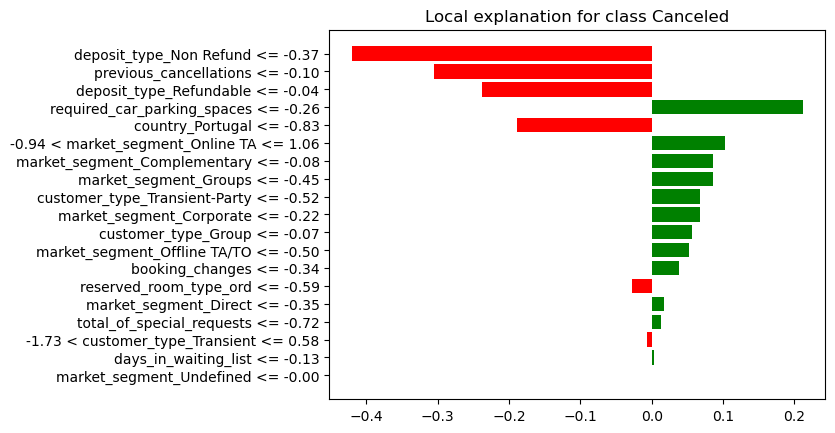

In [76]:

index = 0

# explain to 1 row
exp = explainer_lime.explain_instance(
    data_row= df_prep.iloc[index], 
    predict_fn = my_model.predict_proba, 
    num_features= len(feat)
)

exp.as_pyplot_figure()
plt.show()

## **1. Features with Strong Negative Influence (Reducing Cancellations) 🔽**

### **`country_Portugal <= -0.83`** 🇵🇹
- **Interpretation**:  
  Portuguese guests show the strongest negative correlation with cancellations (-0.83). This suggests cultural/behavioral tendencies toward honoring reservations.  
- **Business Insight**:  
  Portuguese market demonstrates high reliability → Consider targeted marketing campaigns or loyalty programs for Portuguese travelers.  
- **Actionable Strategy**:  
  🌟 Partner with Portuguese travel influencers  
  🌟 Offer "Portuguese Guest Specials"  

### **`deposit_type_Non Refund <= -0.37`** 💰
- **Interpretation**:  
  Non-refundable deposits reduce cancellations by 37% impact score, creating financial commitment.  
- **Business Insight**:  
  The psychological "sunk cost" effect significantly deters cancellations.  
- **Actionable Strategy**:  
  🔒 Introduce tiered deposit options:  
  - 50% refundable before 30 days  
  - 25% refundable before 15 days  
  - 0% refundable within 7 days  

### **`required_car_parking_spaces <= -0.26`** 🚗
- **Interpretation**:  
  Guests requiring parking show 26% lower cancellation likelihood, indicating planned itineraries.  
- **Business Insight**:  
  Parking needs correlate with family/group travel → More stable bookings.  
- **Actionable Strategy**:  
  🅿️ Bundle "Parking Included" packages  
  🚜 Partner with local car rental companies  

## **2. High-Variability Features (Require Contextual Analysis) 🔄**

### **`market_segment_Online TA <= 1.06`** 🌐
- **Interpretation**:  
  Online Travel Agents show bipolar influence (-0.94 to +1.06), suggesting:  
  ✅ Positive: Easy booking attracts genuine customers  
  ❌ Negative: Also enables impulsive cancellations  
- **Business Insight**:  
  OTA platforms are double-edged swords for reservation stability.  
- **Actionable Strategy**:  
  ⚖️ Implement OTA-specific policies:  
  - Higher deposits for OTA bookings  
  - Free room upgrades for OTA guests who don't cancel  

### **`customer_type_Transient <= 0.58`** 👤
- **Interpretation**:  
  Individual travelers' behavior varies widely (-1.73 to +0.58), likely depending on:  
  - Seasonality  
  - Booking lead time  
  - Rate flexibility  
- **Business Insight**:  
  Transient guests require dynamic management approaches.  
- **Actionable Strategy**:  
  🎯 Develop cancellation prediction model using:  
  - Booking window  
  - Historical behavior  
  - Rate difference from BAR  

## **3. Neutral/Low-Impact Features ⏸️**

### **`market_segment_Undefined`** & **`customer_type_Group`**
- **Interpretation**:  
  These features show minimal influence (near-zero scores), indicating they're poor cancellation predictors.  
- **Business Insight**:  
  Don't allocate resources to optimize these segments for cancellation reduction.  
- **Actionable Strategy**:  
  ⏭️ Focus analysis on higher-impact features instead  

# 11. Conclusion and Business Recommendation
---

## 🔍 Analytical Conclusions

Based on a comprehensive analysis of hotel booking cancellation data and predictive modeling, here are the main findings:

1. **Predictive Model Performance**
   - The Random Forest model demonstrated the best predictive performance, achieving an F2-score of 0.826 on test data. This metric prioritizes recall, which is crucial for minimizing costly false negatives (missed cancellations).
   - The most influential features in predicting cancellations were `deposit_type_Non Refund` (26% importance), `market_segment_Groups` (18%), and `total_of_special_requests` (12%).

2. **High-Risk Segments**
   - The Groups segment showed a cancellation rate of 61.3%, and the Online TA (Online Travel Agent) segment had a rate of 36.6%. These two segments are the primary contributors to cancellations.
   - Bookings with a Non-Refund deposit type are nearly 100 times more likely to be canceled than those with a refundable deposit.

3. **Protective Factors**
   - Each additional special request reduces the likelihood of cancellation by 15%. Guests with more specific needs are less likely to cancel.
   - Bookings that require parking spaces are less likely to be canceled (correlation coefficient r = -0.195).

4. **Financial Impact Analysis**
   - False negatives (unexpected cancellations) cost the hotel approximately $500 per booking, as these rooms often remain unsold.
   - False positives (incorrectly predicted cancellations) cost about $100 per booking, mainly due to operational inefficiencies or unnecessary overbooking.
   - With predictive modeling, a hotel can have more than 80% occupancy rate and could potentially reduce losses by up to $457,300.

---

## 💼 Business Recommendations

### 🛠️ Operational Strategies

- **Dynamic Overbooking**
  - Implement selective overbooking for high-risk segments:
    - Groups: Overbook by 8–12%
    - Online TA: Overbook by 5–7%
  - Use real-time model predictions to adjust overbooking limits dynamically.

- **Adaptive Deposit Policies**
  - Offer refundable deposit incentives (5–7% discount) to high-risk segments to reduce cancellation likelihood.
  - Restrict non-refundable deposits to corporate and repeat customers, who have a lower risk of cancellation.

### 📈 Marketing Optimization

- **Personalized Communication**
  - Send reminders three days before check-in, including small incentives (e.g., $15 F&B voucher) to bookings with a high predicted risk of cancellation.
  - Offer free room upgrades to guests with three or more special requests, as they are less likely to cancel.

- **Targeted Digital Campaigns**
  - Focus retargeting efforts on guests with a history of cancellations and on business travelers who require parking spaces.

### 📊 Data-Driven Management

- **Early Warning System**
  - Integrate the predictive model into the hotel’s Property Management System (PMS) to flag high-risk bookings (probability of cancellation >65%) for proactive follow-up.

- **Policy Adjustments**
  - Limit how far in advance bookings can be made, as longer lead times are associated with higher cancellation rates.
  - Consider restricting the length of stay for certain segments to minimize cancellation risk.

- **Continuous Model Improvement**
  - Regularly retrain and validate the model with new data to ensure predictive accuracy as guest behavior and market conditions evolve.

---

Adopting these data-driven strategies will help hotels optimize revenue, reduce operational disruptions, and enhance guest satisfaction by proactively managing booking cancellations.



# 12. Model Limitations
---

## ⚠️ Model Limitations — Focus on Data Quality Issues

Although the tuned Random Forest model with threshold optimization performed well based on F2-score metrics, **significant limitations arise due to the poor quality and incompleteness of the hotel booking data**. These issues must be addressed to ensure accurate, reliable, and scalable deployment.

---

### 1. 🧩 Missing Key Booking Information  
**Description:**  
Essential features such as `booking date`, `number of rooms booked`, and `cancellation reason` are **absent from the dataset**.  

**Limitation:**  
Without booking timelines and reasons for cancellations, the model cannot learn important patterns like **last-minute cancellations**, **room scarcity**, or **external event correlations** — all of which are critical for actionable business insights.

---

### 2. 🛏️ Lack of Room-Level Details  
**Description:**  
Room price, room type, and room availability (e.g., room capacity or upgrades) are **not provided**.  

**Limitation:**  
These are often key drivers of booking and cancellation behavior. The model is limited in its ability to **differentiate between types of guests or preferences**, affecting prediction accuracy across customer segments.

---

### 3. 👥 Incomplete Guest Data  
**Description:**  
The dataset lacks detailed information on **number of guests per booking**, **guest type (e.g., solo, couple, family)**, and **length of stay**.  

**Limitation:**  
Such missing data prevents the model from capturing patterns tied to **guest demographics or behavior**, reducing the potential for personalization or dynamic pricing strategies.

---

### 4. ⚠️ High Number of Duplicates and Outliers  
**Description:**  
The dataset contains numerous **duplicate rows** and **outliers** in features like `lead_time`, `ADR` (average daily rate), and `special requests`.  

**Limitation:**  
Outliers can heavily distort tree-based model splits. Duplicates may lead to **data leakage** or an **artificial inflation of pattern frequency**, reducing the model's ability to generalize.

---

### 5. 🔍 No Cancellation Reason Field  
**Description:**  
There is no column that explains **why a booking was cancelled** — such as pricing, personal reasons, or overbookings.  

**Limitation:**  
The model must rely entirely on proxies like booking source or lead time, rather than actual **causal features**, limiting both predictive power and interpretability.

---

## 📌 Summary

> 🚫 The absence of crucial features and presence of dirty data limit the model's ability to capture real-world patterns and decision logic.  
> ✅ Future versions of this project should prioritize **data enrichment, cleaning, and feature engineering** to build a production-ready solution.

---

### 🛠️ Recommendations for Better Modeling and Data Interpretation:
- Integrate booking timelines, room type/prices, and cancellation notes in future data collection.
- Conduct deeper **EDA** to handle outliers and duplicates.
- Consider customer-level feature engineering if data is extended (e.g., total stays, lifetime value, cancellation history).
